In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

sns.set_style("whitegrid")
colors = sns.color_palette("muted")
sns.set_palette(colors)
sns.set_context("paper", font_scale=1.25, rc={"lines.linewidth": 1.5})

In [2]:
df = pd.read_csv("haberman.csv")

standardize = lambda x: (x-x.mean()) / x.std()


In [27]:
X = df.iloc[:, 0:-1]
X = standardize(X)
status = df['status']

<Figure size 1600x1200 with 0 Axes>

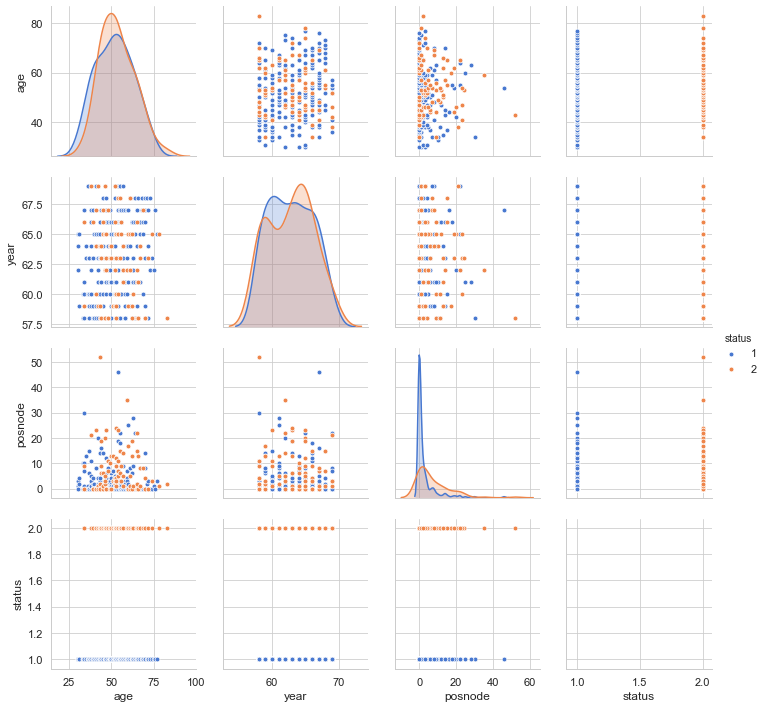

In [28]:
fig = plt.figure(figsize=(8, 6), dpi=200)
sns.pairplot(df, hue='status')
plt.show()

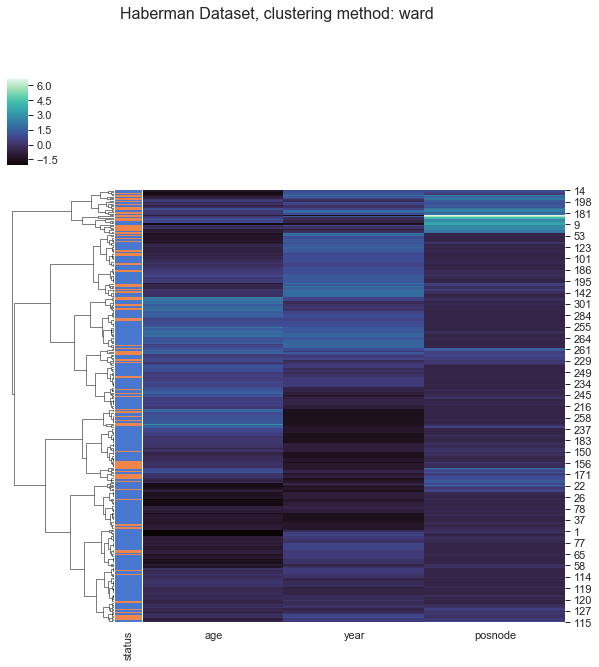

In [33]:
row_colors = status.map(dict(zip(status.unique(), colors)))

methods = ["single", "complete", "average", "weighted", "centroid", "median", "ward"]
# method 0 to 6
method = 6

clustermap = sns.clustermap(X, row_colors=row_colors, method=methods[method], cmap="mako", col_cluster=False)
plt.suptitle(f"Haberman Dataset, clustering method: {methods[method]}", fontsize=16)
clustermap.savefig("haberman.jpg", dpi=300)